# Denoising Diffusion Probabilistic Models (DDPM)

This notebook is an implementation of the DDPM model proposed in the article by Ho et al. [1].

In [17]:
# Python imports
import random

# PyTorch imports
import torch
import torchvision

# Third-party imports
import matplotlib.pyplot as plt
from tabulate import tabulate

## 0. Constants

## 1. Dataset

Let's use CelebA as our dataset.

In [5]:
# Each item in dataset is a tuple of (torch.Tensor, torch.Tensor).
# The first tensor is of shape (3, 218, 178) and dtype torch.float32, which is the image.
# The second tensor is of shape (40,) and dtype torch.int64, which is the attributes consist of 0 and 1.
dataset = torchvision.datasets.CelebA('./data', download=True, transform=torchvision.transforms.ToTensor())

Files already downloaded and verified


Print out the statistics of the dataset.

In [16]:
# Get the size of the dataset.
dataset_size = len(dataset)

# Construct data structures used by tabulate.
headers = ['Property', 'Value']
rows = [
    ['Size', dataset_size],
]

# Print the table.
print(tabulate(rows, headers=headers, tablefmt='github'))

| Property   |   Value |
|------------|---------|
| Size       |  162770 |


Show some samples from the dataset.

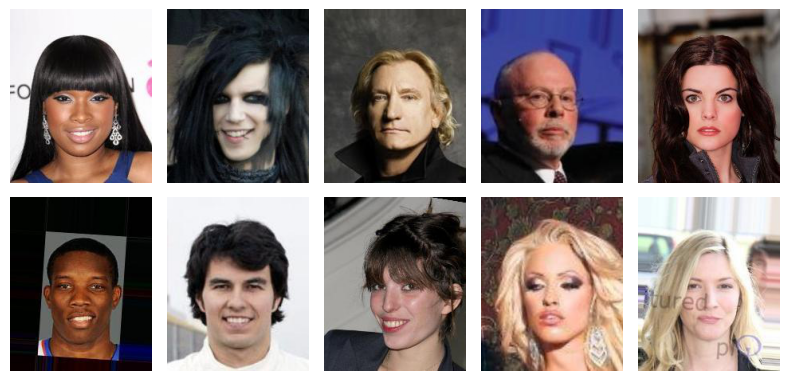

In [36]:
# Sample 10 unique indices from the index range of the dataset.
indices = random.sample(range(dataset_size), k=10)

rows, cols = 2, 5
fig, axs = plt.subplots(rows, cols, figsize=(8, 4))
for i in range(len(indices)):
    row = i // cols
    col = i % cols
    axs[row][col].imshow(dataset[indices[i]][0].permute(1, 2, 0))
    axs[row][col].axis('off')
plt.tight_layout()

## References

[1] Jonathan Ho, Ajay Jain and Pieter Abbeel. Denoising Diffusion Probabilistic Models. arXiv, 2020.